In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../results/results_110624_study0_clean.csv')
print(df.shape)
print(df.columns)

(16000, 95)
Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_train_cm_p1_tn', 'gt_train_cm_p1_fp',
       'gt_train_cm_p1_fn

In [3]:
df.head()

,skmodel,average_probs,std_probs,train_sr_all,train_sr_0,train_sr_1,train_sr_2,train_air_1,train_air_2,pred_sr_all,...,cm_p0,cm_p1,cm_p2,cm_p0_gt,cm_p1_gt,cm_p2_gt,experiment_name,dataset_name,study,timestamp
0,LogisticRegression,0.5299,0.0230,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.4647,...,[[480 353]\n [460 348]],[[261 228]\n [299 265]],[[ 56 100]\n [ 50 100]],[[480 353]\n [460 348]],[[261 228]\n [299 265]],[[ 56 100]\n [ 50 100]],unfair,sample_10000_sep_0.05_flipped_0.0.csv,study0,2024-11-03T11:16:45.033083
1,RandomForestClassifier,0.7398,0.1302,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5043,...,[[743 90]\n [ 89 719]],[[441 48]\n [ 56 508]],[[141 15]\n [ 17 133]],[[743 90]\n [ 89 719]],[[441 48]\n [ 56 508]],[[141 15]\n [ 17 133]],unfair,sample_10000_sep_0.05_flipped_0.0.csv,study0,2024-11-03T11:16:45.422738
2,GaussianNB,0.6265,0.1037,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5587,...,[[484 349]\n [261 547]],[[288 201]\n [169 395]],[[ 85 71]\n [ 37 113]],[[484 349]\n [261 547]],[[288 201]\n [169 395]],[[ 85 71]\n [ 37 113]],unfair,sample_10000_sep_0.05_flipped_0.0.csv,study0,2024-11-03T11:16:45.465775
3,QuadraticDiscriminantAnalysis,0.8841,0.1489,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5020,...,[[757 76]\n [ 86 722]],[[438 51]\n [ 57 507]],[[141 15]\n [ 15 135]],[[757 76]\n [ 86 722]],[[438 51]\n [ 57 507]],[[141 15]\n [ 15 135]],unfair,sample_10000_sep_0.05_flipped_0.0.csv,study0,2024-11-03T11:16:45.524136
4,GradientBoostingClassifier,0.6836,0.1378,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5450,...,[[636 197]\n [120 688]],[[371 118]\n [ 94 470]],[[122 34]\n [ 22 128]],[[636 197]\n [120 688]],[[371 118]\n [ 94 470]],[[122 34]\n [ 22 128]],unfair,sample_10000_sep_0.05_flipped_0.0.csv,study0,2024-11-03T11:16:50.109371


In [2]:
import sys
sys.path.append('../modules')
import aftSandBox as sb
df2 = sb.extract_numbers_from_string(df=df, string_col='dataset_name')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
df2.keys()

Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage'],
      dtype='object')

In [3]:
df3 = sb.expand_matrix_col(df=df2, 
                           matrix_cols=['gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
                                        'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt'],
                           )

data has 46 columns
number of null values: 4000
data now has 86 columns
Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_tra

In [7]:
df3.head()

,skmodel,average_probs,std_probs,train_sr_all,train_sr_0,train_sr_1,train_sr_2,train_air_1,train_air_2,pred_sr_all,...,cm_p0_gt_fn,cm_p0_gt_tp,cm_p1_gt_tn,cm_p1_gt_fp,cm_p1_gt_fn,cm_p1_gt_tp,cm_p2_gt_tn,cm_p2_gt_fp,cm_p2_gt_fn,cm_p2_gt_tp
0,LogisticRegression,0.5299,0.0230,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.4647,...,460,348,261,228,299,265,56,100,50,100
1,RandomForestClassifier,0.7398,0.1302,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5043,...,89,719,441,48,56,508,141,15,17,133
2,GaussianNB,0.6265,0.1037,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5587,...,261,547,288,201,169,395,85,71,37,113
3,QuadraticDiscriminantAnalysis,0.8841,0.1489,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5020,...,86,722,438,51,57,507,141,15,15,135
4,GradientBoostingClassifier,0.6836,0.1378,0.4971,0.4959,0.4931,0.5175,0.9942,1.0434,0.5450,...,120,688,371,118,94,470,122,34,22,128


In [4]:
# statistical parity difference
df3['pred_spd_p1'] = df3['pred_sr_1'] - df3['pred_sr_0']
df3['pred_spd_p2'] = df3['pred_sr_2'] - df3['pred_sr_0']

# equal opportunity difference
df3['pred_eod_p1'] = (df3['cm_p1_tp'] / (df3['cm_p1_tp'] + df3['cm_p1_fn'])) - (df3['cm_p0_tp'] / (df3['cm_p0_tp'] + df3['cm_p0_fn']))
df3['pred_eod_p2'] = (df3['cm_p2_tp'] / (df3['cm_p2_tp'] + df3['cm_p2_fn'])) - (df3['cm_p0_tp'] / (df3['cm_p0_tp'] + df3['cm_p0_fn']))

In [13]:
# statistical parity difference sr_minority minus sr majority
pd.pivot_table(df3, 
               index='experiment_name', 
               values=['pred_sr_all','pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_spd_p1', 'pred_spd_p2', 'pred_eod_p1', 'pred_eod_p2'], 
               aggfunc='mean',
               )

,pred_eod_p1,pred_eod_p2,pred_spd_p1,pred_spd_p2,pred_sr_0,pred_sr_1,pred_sr_2,pred_sr_all
experiment_name,,,,,,,,
fair_dir,-0.043545,-0.051787,-0.029044,-0.025939,0.421241,0.392197,0.395302,0.408440
fair_ftu,-0.002744,0.001487,-0.007359,0.001300,0.418402,0.411043,0.419702,0.415973
fair_oversample,-0.084562,-0.071260,-0.054653,-0.038630,0.487975,0.433322,0.449345,0.464936
unfair,-0.214639,-0.177615,-0.132891,-0.106999,0.453683,0.320792,0.346685,0.396303


In [5]:
df3 = df3.replace([np.inf, -np.inf], np.nan).dropna(subset=['bal_accuracy', 'gt_bal_accuracy','pred_spd_p1', 'pred_spd_p2','pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2'], how="all")
df3.shape

(16000, 90)

In [6]:
# disparate impact
pd.pivot_table(df3, 
               index='experiment_name', 
               values=['pred_air_1', 'pred_air_2'], 
               aggfunc='mean',
               )

,pred_air_1,pred_air_2
experiment_name,,
fair_dir,0.932362,0.933417
fair_ftu,0.988094,1.004746
fair_oversample,0.882327,0.916270
unfair,0.669900,0.732776


In [23]:
df3['groundtruth_tp'] = df3['cm_p0_gt_tp'] + df3['cm_p1_gt_tp'] + df3['cm_p2_gt_tp']
df3['groundtruth_tn'] = df3['cm_p0_gt_tn'] + df3['cm_p1_gt_tn'] + df3['cm_p2_gt_tn']
df3['groundtruth_fn'] = df3['cm_p0_gt_fn'] + df3['cm_p1_gt_fn'] + df3['cm_p2_gt_fn']
df3['groundtruth_fp'] = df3['cm_p0_gt_fp'] + df3['cm_p1_gt_fp'] + df3['cm_p2_gt_fp']

In [24]:
pd.pivot_table(df3,
                index='experiment_name',
                values=['groundtruth_tp', 'groundtruth_tn', 'groundtruth_fn', 'groundtruth_fp'],
                aggfunc='mean',
                )

,groundtruth_fn,groundtruth_fp,groundtruth_tn,groundtruth_tp
experiment_name,,,,
fair_dir,360.766396,72.894001,1485.319522,1199.220386
fair_ftu,334.466158,69.012723,1491.181170,1225.645293
fair_oversample,256.134750,153.678500,1405.289000,1304.897750
unfair,414.949500,87.909500,1473.895500,1143.245500


In [25]:
pd.pivot_table(df3,
                index='class_sep',
                values=['groundtruth_tp', 'groundtruth_tn', 'groundtruth_fn', 'groundtruth_fp'],
                aggfunc='mean',
                )

,groundtruth_fn,groundtruth_fp,groundtruth_tn,groundtruth_tp
class_sep,,,,
0.05,652.645550,202.860209,1353.716754,901.667539
0.10,711.458035,226.109007,1337.259468,851.069089
0.50,589.059500,176.190000,1384.385000,970.365500
1.00,420.131500,125.262000,1435.118000,1139.488500
5.00,105.590000,8.732000,1549.218000,1456.460000
10.00,93.741500,7.907000,1552.803000,1465.548500
15.00,91.576500,8.084500,1551.435500,1468.903500
20.00,90.552000,21.353000,1537.902000,1470.193000


In [26]:
pd.pivot_table(df3,
                index='flip_percentage',
                values=['groundtruth_tp', 'groundtruth_tn', 'groundtruth_fn', 'groundtruth_fp'],
                aggfunc='mean',
                )

,groundtruth_fn,groundtruth_fp,groundtruth_tn,groundtruth_tp
flip_percentage,,,,
0.0,162.442500,162.890000,1395.910000,1398.757500
0.1,196.942500,137.140625,1424.596875,1361.320000
0.2,228.592500,116.761250,1444.407500,1330.238750
0.3,263.324375,102.388750,1456.205000,1298.081875
0.4,296.392095,91.171895,1466.447930,1264.557716
0.5,342.644472,81.428392,1476.918342,1215.842965
0.6,392.238608,74.274684,1484.443038,1169.043671
0.7,450.144854,68.634689,1493.694409,1109.889454
0.8,509.843350,64.001918,1495.166880,1049.530051


In [20]:
pd.pivot_table(df3, 
               index='class_sep', 
               values=['pred_air_1', 'pred_air_2', 'pred_spd_p1', 'pred_spd_p2', 'pred_eod_p1', 'pred_eod_p2'], 
               aggfunc='mean',
               )

,pred_air_1,pred_air_2,pred_eod_p1,pred_eod_p2,pred_spd_p1,pred_spd_p2
class_sep,,,,,,
0.05,0.817305,0.825797,-0.096403,-0.082737,-0.066423,-0.060814
0.10,0.826829,0.855635,-0.094383,-0.063903,-0.063243,-0.048542
0.50,0.855681,0.887423,-0.091129,-0.084514,-0.057526,-0.045005
1.00,0.860686,0.902654,-0.092957,-0.078536,-0.059484,-0.041859
5.00,0.885078,0.918348,-0.083786,-0.071896,-0.055562,-0.039539
10.00,0.885300,0.917597,-0.081946,-0.071537,-0.055821,-0.039924
15.00,0.898700,0.914603,-0.077196,-0.074105,-0.048489,-0.041088
20.00,0.906232,0.943231,-0.078155,-0.073597,-0.044573,-0.026807


In [21]:
pd.pivot_table(df3, 
               index='flip_percentage', 
               values=['pred_air_1', 'pred_air_2', 'pred_spd_p1', 'pred_spd_p2', 'pred_eod_p1', 'pred_eod_p2'], 
               aggfunc='mean',
               )

,pred_air_1,pred_air_2,pred_eod_p1,pred_eod_p2,pred_spd_p1,pred_spd_p2
flip_percentage,,,,,,
0.0,0.986595,0.992203,-0.003915,0.001050,-0.007385,-0.004721
0.1,0.976277,0.994451,-0.011899,-0.009337,-0.011511,-0.002287
0.2,0.957575,0.968998,-0.021049,-0.015794,-0.019616,-0.013004
0.3,0.933971,0.958888,-0.035997,-0.027849,-0.029406,-0.018027
0.4,0.907294,0.923199,-0.051650,-0.042814,-0.040346,-0.030012
0.5,0.863207,0.905766,-0.084257,-0.070746,-0.058491,-0.041006
0.6,0.828893,0.862757,-0.114288,-0.098273,-0.073058,-0.056013
0.7,0.787096,0.823487,-0.145879,-0.134353,-0.092021,-0.071679
0.8,0.736288,0.787879,-0.182557,-0.161137,-0.107381,-0.086709


In [22]:
df3.keys()

Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_train_cm_p1_tn', 'gt_train_cm_p1_fp',
       'gt_train_cm_p1_fn', 'gt_train

In [7]:
def data_group(df, sep_col, flip_col):
    z = df.copy()
    group_list = []
    
    for i, r in z.iterrows():
        if r[sep_col] > 1 and r[flip_col] > 0.4:
            group_list.append('high_sep_high_flip')
        elif r[sep_col] > 1 and r[flip_col] <= 0.4:
            group_list.append('high_sep_low_flip')
        elif r[sep_col] <= 1 and r[flip_col] <= 0.4:
            group_list.append('low_sep_low_flip')
        elif r[sep_col] <= 1 and r[flip_col] > 0.4:
            group_list.append('low_sep_high_flip')
        else:
            group_list.append('other')
    
    z['data_group'] = group_list
    return z

In [8]:
df4 = data_group(df=df3, sep_col = 'class_sep', flip_col = 'flip_percentage')

In [32]:
pd.pivot_table(df4, 
               index='data_group', 
               values=['pred_air_1', 'pred_air_2', 'pred_spd_p1', 'pred_spd_p2', 'pred_eod_p1', 'pred_eod_p2'], 
               aggfunc='mean',
               )

,pred_air_1,pred_air_2,pred_eod_p1,pred_eod_p2,pred_spd_p1,pred_spd_p2
data_group,,,,,,
high_sep_high_flip,0.818497,0.861593,-0.150486,-0.134493,-0.086341,-0.065895
high_sep_low_flip,0.969159,0.985297,-0.010055,-0.011389,-0.015881,-0.007784
low_sep_high_flip,0.742312,0.784414,-0.149365,-0.130031,-0.096901,-0.079372
low_sep_low_flip,0.935568,0.949839,-0.039731,-0.026484,-0.027405,-0.019420


In [33]:
pd.pivot_table(df4, 
               index=['data_group','experiment_name'], 
               values=['pred_air_1', 'pred_air_2', 'pred_spd_p1', 'pred_spd_p2', 'pred_eod_p1', 'pred_eod_p2'], 
               aggfunc='mean',
               )

pred_air_1  pred_air_2  pred_eod_p1  \
data_group         experiment_name                                        
high_sep_high_flip fair_dir           0.877535    0.892145    -0.092422   
                   fair_ftu           0.980531    1.005616     0.000167   
                   fair_oversample    0.823400    0.872502    -0.143371   
                   unfair             0.592520    0.676108    -0.366318   
high_sep_low_flip  fair_dir           0.976518    0.982065    -0.003671   
                   fair_ftu           0.973444    1.003466    -0.001550   
                   fair_oversample    0.969574    0.983143    -0.011923   
                   unfair             0.957100    0.972512    -0.023076   
low_sep_high_flip  fair_dir           0.881011    0.879478    -0.068756   
                   fair_ftu           1.003269    1.015974     0.000534   
                   fair_oversample    0.782454    0.832773    -0.147474   
                   unfair             0.328860    0.431071    -0.366574   
low_sep_low_flip   fair_dir           0.991437    0.976809    -0.010764   
                   fair_ftu           0.996180    0.994670    -0.009918   
                   fair_oversample    0.953881    0.976661    -0.035479   
                   unfair             0.801121    0.851414    -0.102586   

                                    pred_eod_p2  pred_spd_p1  pred_spd_p2  
data_group         experiment_name                                         
high_sep_high_flip fair_dir           -0.112755    -0.056793    -0.049870  
                   fair_ftu            0.003904    -0.009610     0.002177  
                   fair_oversample    -0.125970    -0.085110    -0.061324  
                   unfair             -0.306593    -0.193853    -0.154562  
high_sep_low_flip  fair_dir           -0.014866    -0.012095    -0.009344  
                   fair_ftu           -0.000213    -0.013750     0.001434  
                   fair_oversample    -0.010803    -0.015738    -0.008859  
                   unfair             -0.019674    -0.021943    -0.014369  
low_sep_high_flip  fair_dir           -0.072319    -0.042916    -0.038063  
                   fair_ftu            0.005889    -0.003019     0.001917  
                   fair_oversample    -0.125134    -0.094439    -0.072411  
                   unfair             -0.315738    -0.237501    -0.200843  
low_sep_low_flip   fair_dir           -0.008305    -0.005136    -0.007156  
                   fair_ftu           -0.003343    -0.002752    -0.000290  
                   fair_oversample    -0.023134    -0.023327    -0.011927  
                   unfair             -0.071034    -0.078269    -0.058221

In [38]:
pd.pivot_table(df4,
                index=['data_group'],
                values=['groundtruth_tp', 'groundtruth_tn', 'groundtruth_fn', 'groundtruth_fp'],
                aggfunc='mean',
                )

,groundtruth_fn,groundtruth_fp,groundtruth_tn,groundtruth_tp
data_group,,,,
high_sep_high_flip,171.362750,11.254750,1547.387750,1389.994750
high_sep_low_flip,19.367250,11.783500,1548.291500,1540.557750
low_sep_high_flip,748.852972,130.051938,1431.386822,808.778036
low_sep_low_flip,439.925638,232.569604,1326.525538,1120.408363


In [37]:
pd.pivot_table(df4,
                index=['data_group','experiment_name'],
                values=['groundtruth_tp', 'groundtruth_tn', 'groundtruth_fn', 'groundtruth_fp'],
                aggfunc='mean',
                )

groundtruth_fn  groundtruth_fp  \
data_group         experiment_name                                   
high_sep_high_flip fair_dir             153.467000       11.628000   
                   fair_ftu              96.596000       11.433000   
                   fair_oversample      125.878000       11.801000   
                   unfair               309.510000       10.157000   
high_sep_low_flip  fair_dir              20.564000       12.263000   
                   fair_ftu              14.784000       11.784000   
                   fair_oversample       16.666000       11.763000   
                   unfair                25.455000       11.324000   
low_sep_high_flip  fair_dir             827.131130       62.357143   
                   fair_ftu             797.243562       55.410944   
                   fair_oversample      526.165000      283.576000   
                   unfair               853.016000      109.591000   
low_sep_low_flip   fair_dir             471.260040      205.203815   
                   fair_ftu             460.962926      196.753507   
                   fair_oversample      355.830000      307.574000   
                   unfair               471.817000      220.566000   

                                    groundtruth_tn  groundtruth_tp  
data_group         experiment_name                                  
high_sep_high_flip fair_dir            1547.262000     1407.643000  
                   fair_ftu            1547.267000     1464.704000  
                   fair_oversample     1545.239000     1437.082000  
                   unfair              1549.783000     1250.550000  
high_sep_low_flip  fair_dir            1545.037000     1542.136000  
                   fair_ftu            1550.826000     1542.606000  
                   fair_oversample     1545.697000     1545.874000  
                   unfair              1551.606000     1531.615000  
low_sep_high_flip  fair_dir            1496.657783      728.992537  
                   fair_ftu            1506.415236      761.960300  
                   fair_oversample     1279.104000     1031.155000  
                   unfair              1452.519000      704.874000  
low_sep_low_flip   fair_dir            1352.492972     1088.513052  
                   fair_ftu            1360.991984     1101.532064  
                   fair_oversample     1251.116000     1205.480000  
                   unfair              1341.674000     1085.943000

In [40]:
pd.pivot_table(df4,
                index=['data_group','experiment_name'],
                values=['accuracy','bal_accuracy', 'average_probs', 'gt_accuracy', 'gt_bal_accuracy'],
                aggfunc='mean',
                )

accuracy  average_probs  bal_accuracy  \
data_group         experiment_name                                          
high_sep_high_flip fair_dir         0.841703       0.860456      0.860569   
                   fair_ftu         0.828883       0.852812      0.852627   
                   fair_oversample  0.852883       0.893886      0.876379   
                   unfair           0.873027       0.881496      0.878152   
high_sep_low_flip  fair_dir         0.945657       0.924053      0.950099   
                   fair_ftu         0.947033       0.924354      0.952031   
                   fair_oversample  0.947416       0.930271      0.952128   
                   unfair           0.946767       0.925275      0.950971   
low_sep_high_flip  fair_dir         0.740269       0.740025      0.678207   
                   fair_ftu         0.734586       0.738814      0.674804   
                   fair_oversample  0.717632       0.722133      0.710953   
                   unfair           0.770694       0.752953      0.718132   
low_sep_low_flip   fair_dir         0.768157       0.740886      0.760346   
                   fair_ftu         0.774087       0.746073      0.766510   
                   fair_oversample  0.764138       0.739425      0.764973   
                   unfair           0.769417       0.741767      0.762154   

                                    gt_accuracy  gt_bal_accuracy  
data_group         experiment_name                                
high_sep_high_flip fair_dir            0.943604         0.943511  
                   fair_ftu            0.961096         0.961242  
                   fair_oversample     0.950930         0.950889  
                   unfair              0.894786         0.894657  
high_sep_low_flip  fair_dir            0.987974         0.987994  
                   fair_ftu            0.990557         0.990558  
                   fair_oversample     0.989809         0.989839  
                   unfair              0.986981         0.987009  
low_sep_high_flip  fair_dir            0.712306         0.711623  
                   fair_ftu            0.727015         0.726539  
                   fair_oversample     0.735628         0.735560  
                   unfair              0.689726         0.689844  
low_sep_low_flip   fair_dir            0.780994         0.781169  
                   fair_ftu            0.788980         0.789137  
                   fair_oversample     0.785313         0.785321  
                   unfair              0.776013         0.775981

Above, groundtruth accuracy improves for all fairness strategies. However, it could be that this accuracy is because we are classifying more 0s correctly. Hence, we need to focus on the false positives and false negatives.

In [42]:
pd.pivot_table(df4,
                index=['flip_percentage'],
                values=['accuracy','bal_accuracy', 'average_probs', 'gt_accuracy', 'gt_bal_accuracy'],
                aggfunc='mean',
                )

,accuracy,average_probs,bal_accuracy,gt_accuracy,gt_bal_accuracy
flip_percentage,,,,,
0.0,0.894908,0.855263,0.894918,0.894908,0.894918
0.1,0.875299,0.842728,0.875371,0.891671,0.891775
0.2,0.857147,0.832121,0.857018,0.887937,0.888020
0.3,0.838523,0.823590,0.837880,0.881355,0.881361
0.4,0.823493,0.816640,0.822045,0.873605,0.873643
0.5,0.809799,0.810437,0.805907,0.860827,0.860861
0.6,0.798102,0.807052,0.791767,0.847627,0.847801
0.7,0.791793,0.804591,0.780898,0.831488,0.831524
0.8,0.789075,0.804155,0.771640,0.813013,0.812564


In [43]:
pd.pivot_table(df4,
                index=['class_sep'],
                values=['accuracy','bal_accuracy', 'average_probs', 'gt_accuracy', 'gt_bal_accuracy'],
                aggfunc='mean',
                )

,accuracy,average_probs,bal_accuracy,gt_accuracy,gt_bal_accuracy
class_sep,,,,,
0.05,0.730340,0.716380,0.702680,0.716846,0.716372
0.10,0.720773,0.707310,0.688208,0.701674,0.701768
0.50,0.762352,0.746397,0.737277,0.758013,0.758030
1.00,0.805234,0.789168,0.791068,0.820700,0.820680
5.00,0.898245,0.897515,0.908291,0.961633,0.961650
10.00,0.899122,0.897639,0.910102,0.963979,0.964098
15.00,0.899174,0.900695,0.910513,0.965439,0.965399
20.00,0.895143,0.900452,0.907572,0.961818,0.961702


In [39]:
df4.keys()

Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_train_cm_p1_tn', 'gt_train_cm_p1_fp',
       'gt_train_cm_p1_fn', 'gt_train

In [41]:
df4.to_csv('../stata/results_110224_study0_clean.csv', index=False)

In [ ]:
# Analysis:
# Impact of fairness strategies on fairness metrics, controlling for class separation and flip percentage
# 

# Plots

In [10]:
df4.shape

(16000, 91)

In [45]:
df4.keys()

Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_train_cm_p1_tn', 'gt_train_cm_p1_fp',
       'gt_train_cm_p1_fn', 'gt_train

In [9]:
pd.pivot_table(df4,
                index=['experiment_name'],
                values=['bal_accuracy', 'gt_bal_accuracy','pred_spd_p1', 'pred_spd_p2',
                        'pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2'],
                aggfunc='mean',
                )

,bal_accuracy,gt_bal_accuracy,pred_air_1,pred_air_2,pred_eod_p1,pred_eod_p2,pred_spd_p1,pred_spd_p2
experiment_name,,,,,,,,
fair_dir,0.809281,0.852510,0.932362,0.933417,-0.042827,-0.050932,-0.028557,-0.025508
fair_ftu,0.808387,0.862874,0.988094,1.004746,-0.002686,0.001461,-0.007222,0.001279
fair_oversample,0.826108,0.865402,0.882327,0.916270,-0.084562,-0.071260,-0.054653,-0.038630
unfair,0.827352,0.836873,0.669900,0.732776,-0.214639,-0.177615,-0.132891,-0.106999


<Axes: xlabel='bal_accuracy', ylabel='pred_sr_0'>

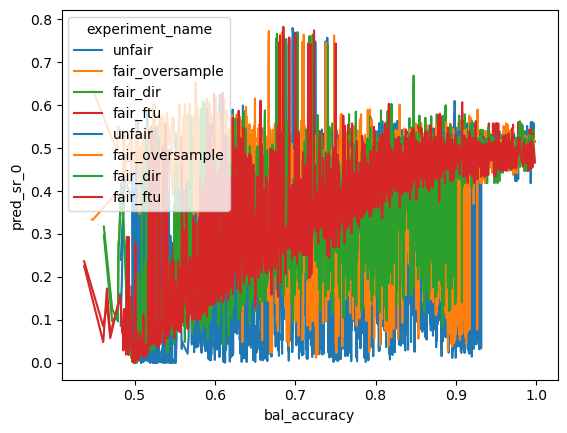

In [48]:
import seaborn as sns
sns.lineplot(x='bal_accuracy', y='pred_sr_0', data=df4, hue='experiment_name')
sns.lineplot(x='bal_accuracy', y='pred_sr_1', data=df4, hue='experiment_name')

In [8]:
# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

X = df[['class_sep', 'flip_percentage','bal_accuracy', 'gt_bal_accuracy','pred_spd_p1', 'pred_spd_p2','pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2']]
X = X.dropna()
print(X.shape)

(15844, 10)


In [10]:
X

,class_sep,flip_percentage,bal_accuracy,gt_bal_accuracy,pred_spd_p1,pred_spd_p2,pred_eod_p1,pred_eod_p2,pred_air_1,pred_air_2
0,0.05,0.0,0.503852,0.503852,0.0410,0.2264,0.039165,0.235974,1.0960,1.5300
1,0.05,0.0,0.895021,0.895021,0.0350,-0.0093,0.010858,-0.003185,1.0710,0.9811
2,0.05,0.0,0.636502,0.636502,0.0200,0.0553,0.023374,0.076353,1.0366,1.1013
3,0.05,0.0,0.900057,0.900057,0.0436,0.0039,0.005372,0.006436,1.0897,1.0080
4,0.05,0.0,0.804405,0.804405,0.0191,-0.0099,-0.018152,0.001848,1.0354,0.9817
...,...,...,...,...,...,...,...,...,...,...
15995,5.00,0.9,0.829852,0.964667,0.0098,-0.0658,-0.094490,-0.071341,1.0206,0.8626
15996,5.00,0.9,0.724192,0.818000,0.0305,-0.0941,0.099277,-0.266463,1.0932,0.7115
15997,5.00,0.9,0.725667,0.822667,0.0060,-0.0369,-0.100542,-0.031098,1.0178,0.8892
15998,5.00,0.9,0.820038,0.956000,0.0252,-0.0718,0.006414,-0.169512,1.0541,0.8458


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../results/results_110624_study0_clean.csv')
print(df.shape)
print(df.columns)

C:\Users\koa223\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(16000, 95)
Index(['skmodel', 'average_probs', 'std_probs', 'train_sr_all', 'train_sr_0',
       'train_sr_1', 'train_sr_2', 'train_air_1', 'train_air_2', 'pred_sr_all',
       'pred_sr_0', 'pred_sr_1', 'pred_sr_2', 'pred_air_1', 'pred_air_2',
       'accuracy', 'bal_accuracy', 'gt_accuracy', 'gt_bal_accuracy', 'gt_sr_0',
       'gt_sr_1', 'gt_sr_2', 'gt_sr_all', 'accuracy_p0', 'accuracy_p1',
       'accuracy_p2', 'gt_accuracy_p0', 'gt_accuracy_p1', 'gt_accuracy_p2',
       'gt_train_cm_all', 'gt_train_cm_p0', 'gt_train_cm_p1', 'gt_train_cm_p2',
       'cm_p0', 'cm_p1', 'cm_p2', 'cm_p0_gt', 'cm_p1_gt', 'cm_p2_gt',
       'experiment_name', 'dataset_name', 'study', 'timestamp', 'sample_size',
       'class_sep', 'flip_percentage', 'gt_train_cm_all_tn',
       'gt_train_cm_all_fp', 'gt_train_cm_all_fn', 'gt_train_cm_all_tp',
       'gt_train_cm_p0_tn', 'gt_train_cm_p0_fp', 'gt_train_cm_p0_fn',
       'gt_train_cm_p0_tp', 'gt_train_cm_p1_tn', 'gt_train_cm_p1_fp',
       'gt_train_cm_p1_fn

In [3]:
df2 = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['bal_accuracy', 'gt_bal_accuracy','pred_spd_p1', 'pred_spd_p2','pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2'], how="all")
df2.shape


(16000, 95)

In [4]:
# round values in each column to 4 decimal places
for col in df2.columns:
    df2[col] = df2[col].round(4)

In [14]:
# kmeans clustering 
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

X = df2[['bal_accuracy', 'gt_bal_accuracy','pred_spd_p1', 'pred_spd_p2','pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2']]
X = X.dropna().reset_index(drop=True)

#X = StandardScaler().fit_transform(X)

print(X.shape)
#X_array = X.to_numpy()
try:
    # create elbow plot
    ks = range(1, 10)
    inertias = []
    for k in ks:
        model = MiniBatchKMeans(n_clusters=k, batch_size=1000)
        model.fit(X)
        inertias.append(model.inertia_)

    # plot the inertias
    plt.plot(range(1,10), inertias, marker='o') # x=range(1,31), y=the list of interias, marker represents the shape of the point in the plot
    plt.title('Elbow method') # label the chart
    plt.xlabel('Number of clusters') # label the  x axis
    plt.ylabel('Inertia') # label the y axis
    plt.show() # display the plot
except Exception as e:
    print(e)

(15844, 8)
'NoneType' object has no attribute 'split'


C:\Users\koa223\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df2.isna().sum()

skmodel              0
average_probs        0
std_probs            0
train_sr_all         0
train_sr_0        4000
                  ... 
groundtruth_tp       0
groundtruth_tn       0
groundtruth_fn       0
groundtruth_fp       0
data_group           0
Length: 95, dtype: int64

In [7]:
import psutil
print(psutil.virtual_memory())

svmem(total=137133891584, available=112902045696, percent=17.7, used=24231845888, free=112902045696)


In [42]:
X.dtypes

bal_accuracy       float64
gt_bal_accuracy    float64
pred_spd_p1        float64
pred_spd_p2        float64
pred_eod_p1        float64
pred_eod_p2        float64
pred_air_1         float64
pred_air_2         float64
dtype: object

In [44]:
if X.empty:
    print('X is None')

In [21]:
X.shape[0]

1000

In [ ]:
# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

X = df3[['class_sep', 'flip_percentage','bal_accuracy', 'gt_bal_accuracy',
         'pred_spd_p1', 'pred_spd_p2','pred_eod_p1', 'pred_eod_p2','pred_air_1', 'pred_air_2']]
X = X.dropna()
#X = StandardScaler().fit_transform(X)


# create elbow plot
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# plot the inertias
plt.plot(range(1,10), inertias, marker='o') # x=range(1,31), y=the list of interias, marker represents the shape of the point in the plot
plt.title('Elbow method') # label the chart
plt.xlabel('Number of clusters') # label the  x axis
plt.ylabel('Inertia') # label the y axis
plt.show() # display the plot

: 